# Comparación entre órdenes de reacción

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FIGURES_FOLDER = "velocidad_reaccion"

In [3]:
os.makedirs(FIGURES_FOLDER, exist_ok=True)

Generar conversión:

$$
X_{A} = \frac{mol \text{ de } A \text{ (reactivo limitante) que reacciona}}{mol \text{ de } A \text{ (reactivo limitante) que entra}}
$$

Por lo que:

$$
X_{A} \in [0,1)
$$

In [4]:
X = np.geomspace(1, 1.95, num=1000) - 1

Ecuación de velocidad $r_{A}$ irreversible de orden mayor a cero:

$$
-r_{A} = k C_{A0}^{n} \left ( 1 - X_{A} \right )^{n}
$$

In [5]:
def r_a(x, n=1):
    return - k * np.power(C_A0, n) * np.power(1 - x, n)

Definimos: $ k=1 \wedge C_{A0} = 1000 $. Solo para graficar

In [6]:
k = 1
C_A0 = 100

Graficamos $ \frac{1}{-r_{A}} $ en función de $ X_{A} $ para diferentes valores de $ n $ (orden de reacción)

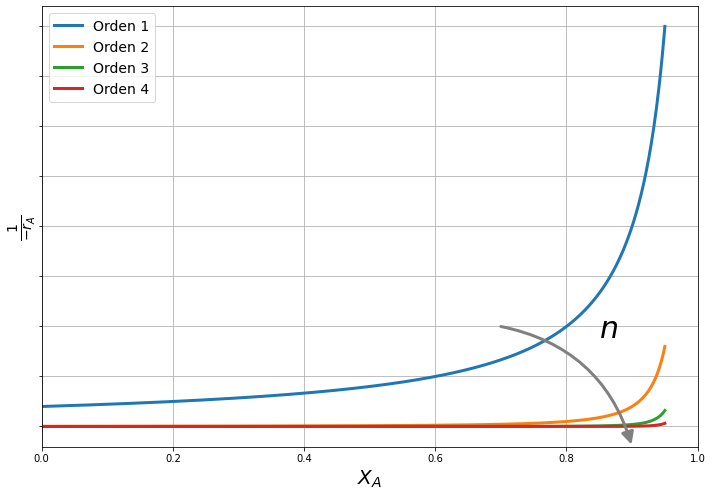

In [7]:
fig, ax = plt.subplots(figsize=(10, 7))

N = 4

for n in range(1, N + 1):
    ax.plot(X, 1 / - r_a(X, n), label="Orden {}".format(n), linewidth=3)
    
ax.set_xlabel(r'$X_{A}$', fontsize=20)
ax.set_xlim(0, 1.0)
ax.set_ylabel(r'$\frac{1}{-r_{A}}$', fontsize=20)
ax.tick_params(labelleft=False)
ax.legend(fontsize=14)
ax.grid()

# Texto sobre avance en n

ax.annotate(
    "",
    xy=(0.7, 0.05), xycoords='data',
    xytext=(0.9, -0.01), textcoords='data',
    arrowprops={
        "arrowstyle": "<|-",
        "color": "0.5",
        "patchB": None,
        "shrinkB": 0,
        "linewidth": 3,
        "mutation_scale": 25,
        "connectionstyle": "arc3,rad=0.3",
    },
)
ax.text(0.85, 0.3, r'$n$', transform=ax.transAxes, ha="left", va="top", fontsize=30)

fig.tight_layout()
plt.savefig(os.path.join(FIGURES_FOLDER, 'ordenes_reaccion.png'), bbox_inches='tight')

# Función escalón

Ésta vez $X_{A}$ debe tomar valores hasta 1, para probar la función escalón

$$
X_{A} \in [0, 1]
$$

In [8]:
X = np.geomspace(1, 2, num=1000) - 1

In [9]:
EPSILON = 1e-10

def theta(x):
    mask = np.abs(x - 1.0) > EPSILON
    out = np.ones(len(x))
    return out * mask

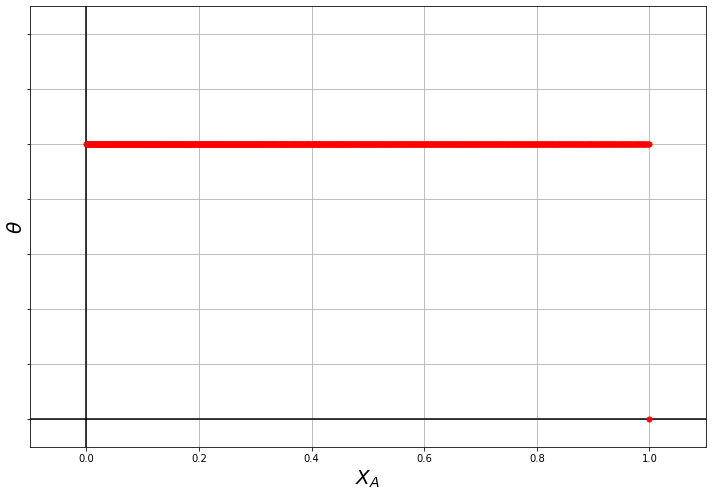

In [10]:
X_LIMS = (-0.1, 1.1)
Y_LIMS = (-0.1, 1.5)

fig, ax = plt.subplots(figsize=(10, 7))

# Explicitar ejes x e y
ax.plot(X_LIMS, (0, 0), "k")
ax.plot((0, 0), Y_LIMS, "k")

ax.plot(X, theta(X), ".r", markersize=10)
    
ax.set_xlabel(r'$X_{A}$', fontsize=20)
ax.set_ylabel(r'$\theta$', fontsize=20)
ax.set_xlim(X_LIMS)
ax.set_ylim(Y_LIMS)
ax.tick_params(labelleft=False)
ax.grid()

fig.tight_layout()
plt.savefig(os.path.join(FIGURES_FOLDER, 'funcion_theta.png'), bbox_inches='tight')